In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_list = ['accounts.csv', 'mission_data.csv', 'personnel_data.csv', 'unit_data.csv']

In [3]:
dataframes = {}
for file in file_list:
    try:
        df = pd.read_csv(file)
        dataframes[file] = df
        print(f"Data from {file}:")
        print(df.head(), "\n")
        print(df.tail(), "\n")
    except Exception as e:
        print(f"Error loading {file}: {e}")

Data from accounts.csv:
    nim  password   role
0  1000  fXHIxmbW  admin
1  1001  bBa8WgeF   user
2  1002  LZsHJVTX  admin
3  1003  m93H18E4   user
4  1004  AbG82ES6  admin 

      nim  password   role
995  1995  Xomo7QqS   user
996  1996  mVSQtpGY  staff
997  1997  4XnHZ0de  admin
998  1998  KNKmF8e6  admin
999  1999  DuWRVZZd   user 

Data from mission_data.csv:
   mission_id mission_name    location  \
0           1    Mission_1  Location_1   
1           2    Mission_2  Location_2   
2           3    Mission_3  Location_3   
3           4    Mission_4  Location_4   
4           5    Mission_5  Location_5   

                             involved_personnel  
0                                     1975,1496  
1  1700,1891,1224,1105,1363,1133,1659,1764,1120  
2  1131,1232,1796,1324,1862,1222,1513,1556,1364  
3       1779,1856,1809,1150,1870,1165,1338,1694  
4       1861,1261,1311,1021,1774,1526,1980,1254   

    mission_id mission_name      location  \
95          96   Mission_96   Lo

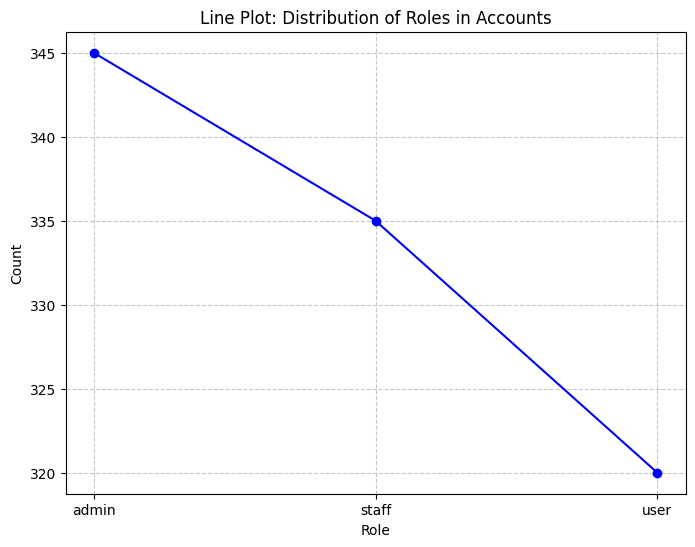

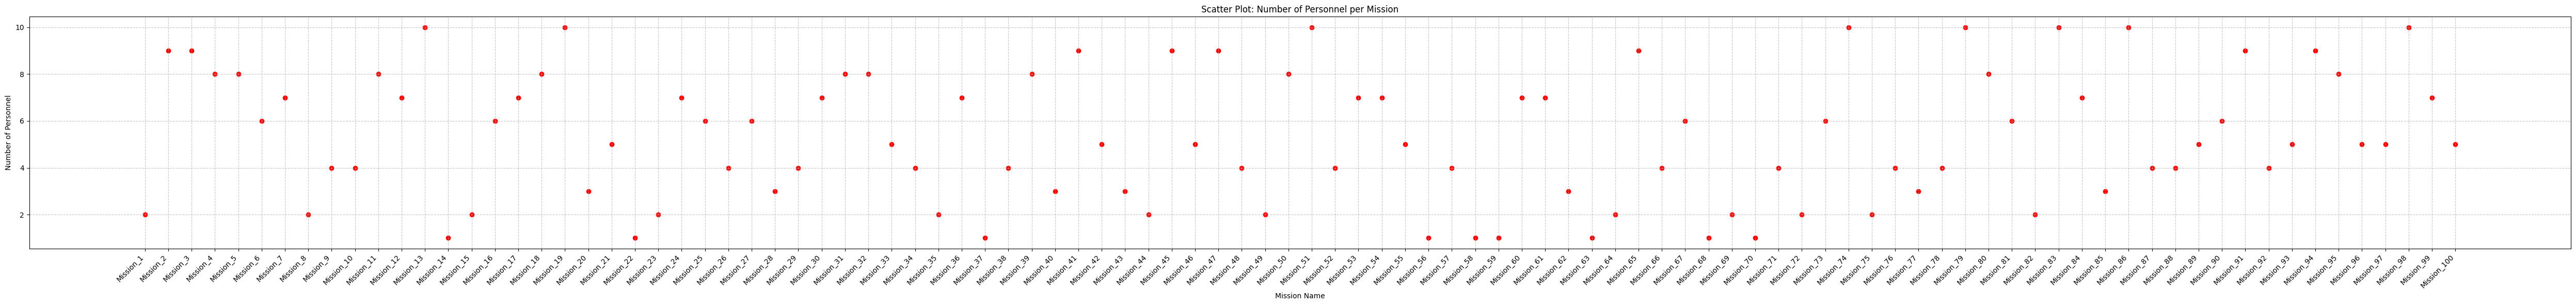

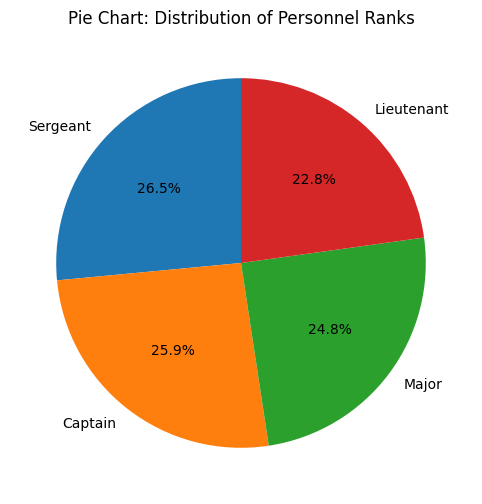

In [4]:
# 1. Line Plot
if dataframes["accounts.csv"] is not None:
    df_accounts = dataframes["accounts.csv"]
    role_counts = df_accounts['role'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.plot(role_counts.index, role_counts.values, marker='o', linestyle='-', color='b')
    plt.title('Line Plot: Distribution of Roles in Accounts')
    plt.xlabel('Role')
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 2. Scatter Plot
if dataframes["mission_data.csv"] is not None:
    df_mission = dataframes["mission_data.csv"]
    df_mission['num_personnel'] = df_mission['involved_personnel'].apply(lambda x: len(str(x).split(',')))
    plt.figure(figsize=(50, 6))
    plt.scatter(df_mission['mission_name'], df_mission['num_personnel'], color='r')
    plt.title('Scatter Plot: Number of Personnel per Mission')
    plt.xlabel('Mission Name')
    plt.ylabel('Number of Personnel')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


# 3. Pie Chart
if dataframes["personnel_data.csv"] is not None:
    df_personnel = dataframes["personnel_data.csv"]
    rank_counts = df_personnel['rank'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(rank_counts, labels=rank_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    plt.title('Pie Chart: Distribution of Personnel Ranks')
    plt.show()

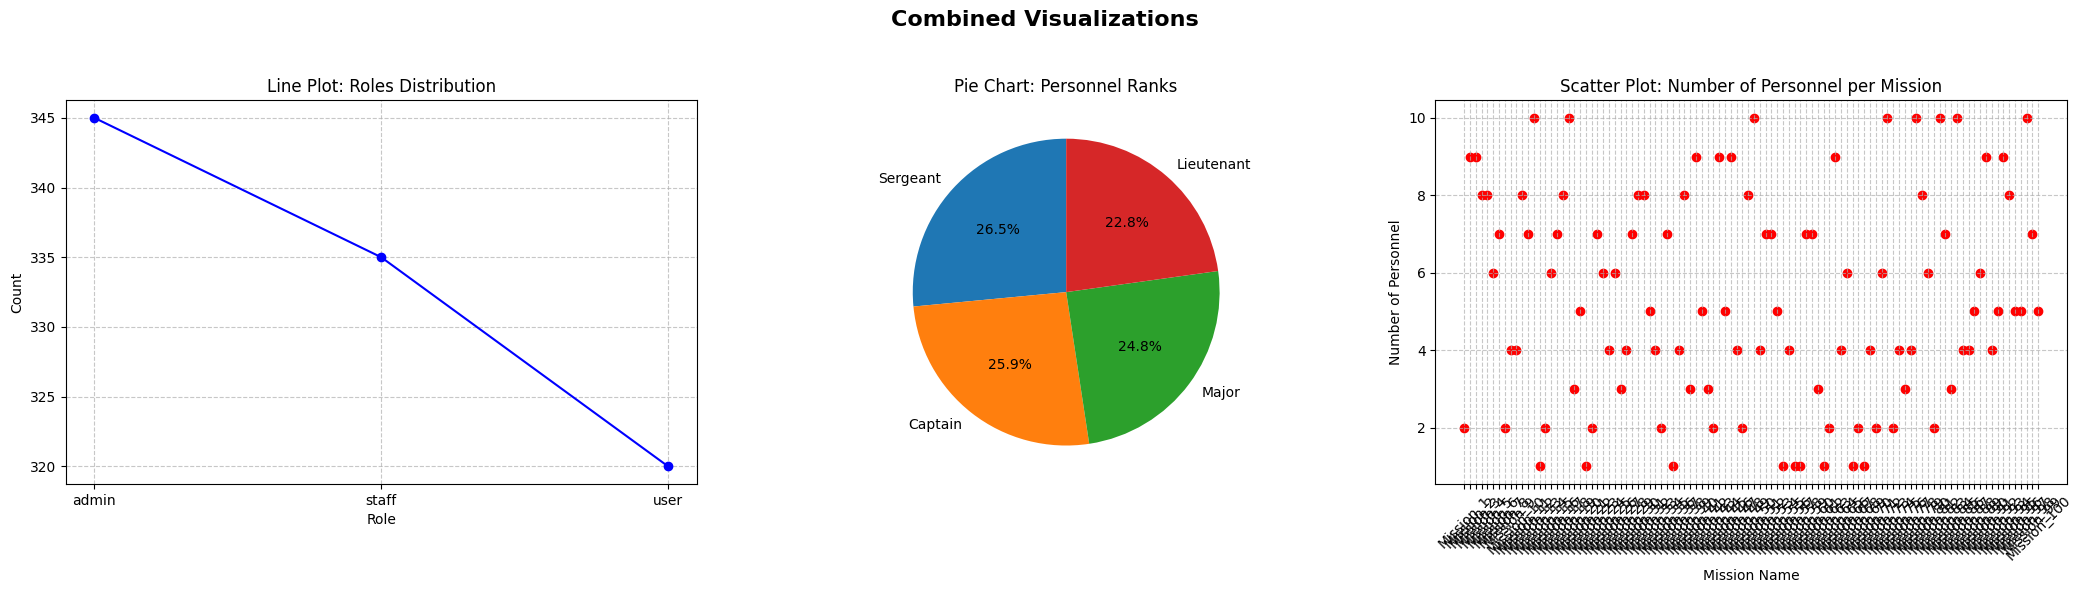

In [10]:
# Create Subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))  # subplots dalam satu baris
fig.suptitle('Combined Visualizations', fontsize=16, fontweight='bold')

# Line Plot
if dataframes["accounts.csv"] is not None:
    axes[0].plot(role_counts.index, role_counts.values, marker='o', linestyle='-', color='b')
    axes[0].set_title('Line Plot: Roles Distribution')
    axes[0].set_xlabel('Role')
    axes[0].set_ylabel('Count')
    axes[0].grid(True, linestyle='--', alpha=0.7)

# Pie Chart
if dataframes["personnel_data.csv"] is not None:
    axes[1].pie(rank_counts, labels=rank_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    axes[1].set_title('Pie Chart: Personnel Ranks')

# Scatter Plot
if dataframes["mission_data.csv"] is not None:
    df_mission = dataframes["mission_data.csv"]
    df_mission['num_personnel'] = df_mission['involved_personnel'].apply(lambda x: len(str(x).split(',')))
    axes[2].scatter(df_mission['mission_name'], df_mission['num_personnel'], color='r')
    axes[2].set_title('Scatter Plot: Number of Personnel per Mission')
    axes[2].set_xlabel('Mission Name')
    axes[2].set_ylabel('Number of Personnel')
    axes[2].tick_params(axis='x', rotation=45, labelright=True)
    axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()